In [7]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display


In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int

In [3]:
def adder(state: AgentState) -> AgentState:
    """balabala"""
    state['finalNumber'] = state['number1'] + state['number2']

    return state

def subtractor(state: AgentState) -> AgentState:
    """ddssf """
    state['finalNumber'] = state['number1'] - state['number2']
    return state

In [4]:
def decide_next_node(state: AgentState) -> str:
    """  ddd """
    if state['operation'] == "+":
        return "addition_operation"
    else:
        return "subtraction_operation"

In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state: state) # passthrough function
graph.add_edge(START, "router")

graph.add_conditional_edges(
    source="router",
    path=decide_next_node,
    path_map={
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)

app = graph.compile()



In [6]:
png_bytes = app.get_graph().draw_mermaid_png()
with open("langgraph_diagram.png", "wb") as f:
    f.write(png_bytes)

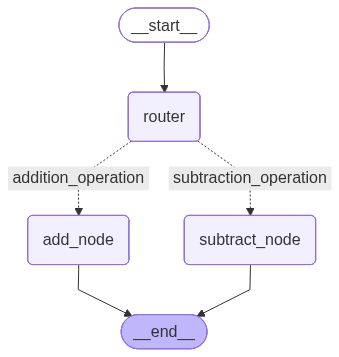

In [8]:
display(Image(data=app.get_graph().draw_mermaid_png()))


In [21]:
state_1 = AgentState(number1=1,number2=2,operation="+")
app.invoke(state_1)

{'number1': 1, 'operation': '+', 'number2': 2, 'finalNumber': 3}

In [22]:
state_1 = AgentState(number1=1,number2=2,operation="-")
app.invoke(state_1)

{'number1': 1, 'operation': '-', 'number2': 2, 'finalNumber': -1}

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int

    number3: int
    operation2: str
    number4: int

    finalNumber1: int
    finalNumber2: int

In [3]:
def decide_add_sub1(state: AgentState) -> str:
    print(f"Operation1:{state['operation1']}\n")
    if state['operation1'] == "+":
        print(f"go to addition_operation1\n")
        return "addition_operation1"
    else:
        print(f"go to subtraction_operation1\n")
        return "subtraction_operation1"  
    
def decide_add_sub2(state: AgentState) -> str:
    print(f"Operation2:{state['operation2']}\n")
    if state['operation2'] == "+":
        print(f"go to addition_operation2\n")
        return "addition_operation2"
    else:
        print(f"go to subtraction_operation2\n")
        return "subtraction_operation2"  

In [4]:
def adder1(state: AgentState) -> AgentState:
    """balabala"""
    state['finalNumber1'] = state['number1'] + state['number2']

    return state

def subtractor1(state: AgentState) -> AgentState:
    """ddssf """
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

In [5]:
def adder2(state: AgentState) -> AgentState:
    """balabala"""
    state['finalNumber2'] = state['number3'] + state['number4']

    return state

def subtractor2(state: AgentState) -> AgentState:
    """ddssf """
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

In [ ]:
graph = StateGraph(AgentState)

#graph.add_node("router1", lambda state: state)

graph.add_node("add_node1", adder1)
graph.add_node("subtract_node1", subtractor1)
graph.add_node("router2", lambda state: state)
graph.add_node("add_node2",adder2)
graph.add_node("subtract_node2", subtractor2)

#graph.add_edge(START, "router1")

graph.add_conditional_edges(source=START,
                            path=decide_add_sub1,
                            path_map={
                                "addition_operation1":"add_node1",
                                "subtraction_operation1":"subtract_node1"
                            })

graph.add_conditional_edges(source="router2",
                            path=decide_add_sub2,
                            path_map={
                                "addition_operation2":"add_node2",
                                "subtraction_operation2":"subtract_node2"
                            })

graph.add_edge("add_node1","router2")
graph.add_edge("subtract_node1","router2")
graph.add_edge("add_node2",END)
graph.add_edge("subtract_node2",END)

app = graph.compile()


In [48]:
state_1 = AgentState(number1=332,number2=234522,operation1="-",number3=2323,number4=555555555,operation2="+")
state_2 = AgentState(number1=332,number2=234522,operation1="+",number3=2323,number4=555555555,operation2="+")

In [49]:
result = app.invoke(state_1)

Operation1:-

go to subtraction_operation1

Operation2:+

go to addition_operation2



In [50]:
result

{'number1': 332,
 'operation1': '-',
 'number2': 234522,
 'number3': 2323,
 'operation2': '+',
 'number4': 555555555,
 'finalNumber1': -234190,
 'finalNumber2': 555557878}

In [51]:
result = app.invoke(state_2)

Operation1:+

go to addition_operation1

Operation2:+

go to addition_operation2



In [52]:
result

{'number1': 332,
 'operation1': '+',
 'number2': 234522,
 'number3': 2323,
 'operation2': '+',
 'number4': 555555555,
 'finalNumber1': 234854,
 'finalNumber2': 555557878}

In [27]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, List, Dict
import random

In [28]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [39]:
def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node"""
    print(f"""hi there, {state['name']}""")
    state["counter"] = 0

    return state

def random_node(state: AgentState) -> AgentState:
    """Random number"""

    state["number"].append(random.randint(-5,5))
    state["counter"] += 1

    return state

def should_continue(state: AgentState) -> str:
    """decide what to do next"""
    if sum(state["number"]) != 0:
        print("Entering loop", state["counter"])
        return "loop"
    else:
        return "exit"

In [40]:
graph = StateGraph(AgentState)

graph.add_node("greeting_node", greeting_node)
graph.add_node("random_node", random_node)
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node","random_node")

graph.add_conditional_edges(
    source="random_node",
    path=should_continue,
    path_map={
        "loop": "random_node",
        "exit": END
    }
)

app = graph.compile()

In [41]:
app.invoke({"name": "Jerry", "number": [], "counter":-3})

hi there, Jerry
Entering loop 1
Entering loop 2
Entering loop 3
Entering loop 4
Entering loop 5
Entering loop 6
Entering loop 7
Entering loop 8
Entering loop 9
Entering loop 10
Entering loop 11
Entering loop 12
Entering loop 13
Entering loop 14


{'name': 'Jerry',
 'number': [2, 5, 3, -3, -3, -3, 1, 3, 3, -1, 5, 0, -3, -4, -5],
 'counter': 15}